<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/3_%EA%B8%B0%EB%B3%B8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 1.환경설정

### (1) 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


#### 2) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/data2.csv')

## 2.데이터 준비

### (1) NA 조치

In [ ]:
data2.isna().sum()

,0
Date,0
Car_count,0
Register,0
Boarding,0
Wait_time,0
Average_mean,0
Riding_mean,0
Day_of_week,0
Month,0
Year,0


In [ ]:
data2.dropna(inplace = True)

In [ ]:
data2.isna().sum()

,0
Date,0
Car_count,0
Register,0
Boarding,0
Wait_time,0
Average_mean,0
Riding_mean,0
Day_of_week,0
Month,0
Year,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 6 to 2921
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2916 non-null   object 
 1   Car_count             2916 non-null   int64  
 2   Register              2916 non-null   int64  
 3   Boarding              2916 non-null   int64  
 4   Wait_time             2916 non-null   float64
 5   Average_mean          2916 non-null   int64  
 6   Riding_mean           2916 non-null   int64  
 7   Day_of_week           2916 non-null   object 
 8   Month                 2916 non-null   int64  
 9   Year                  2916 non-null   int64  
 10  waiting_time          2916 non-null   float64
 11  temp_max              2916 non-null   float64
 12  temp_min              2916 non-null   float64
 13  rain(mm)              2916 non-null   float64
 14  humidity_max(%)       2916 non-null   float64
 15  humidity_min(%)       2916

In [ ]:
data2.head()

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,season,holiday,7_day_wait_time_mean,Boarding_rate,Cancel,Total_wait
6,2015-01-07,410,4085,3676,24.7,2230,8646,Wednesday,1,2015,...,42.0,24.0,10.12,1,Winter,0.0,23.657143,0.899878,0.000272,100899.5
7,2015-01-08,419,4030,3728,21.2,2231,8683,Thursday,1,2015,...,62.0,27.0,10.09,1,Winter,0.0,23.371429,0.925062,0.000268,85436.0
8,2015-01-09,424,4167,3813,21.8,2215,8506,Friday,1,2015,...,78.0,38.0,8.74,1,Winter,0.0,24.028571,0.915047,0.000262,90840.6
9,2015-01-10,215,1916,1645,41.2,2447,11123,Saturday,1,2015,...,81.0,33.0,9.41,1,Winter,0.0,26.171429,0.858559,0.000608,78939.2
10,2015-01-11,187,1700,1572,28.8,2419,10806,Sunday,1,2015,...,83.0,39.0,9.60,1,Winter,1.0,26.785714,0.924706,0.000636,48960.0


In [ ]:
data2.loc[data2['Day_of_week']=='Saturday','holiday'] = 1

In [ ]:
sum(data2['holiday'] == 1)

937

### (2) 가변수화

In [ ]:
data2.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Day_of_week', 'Month', 'Year',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'season', 'holiday',
       '7_day_wait_time_mean', 'Boarding_rate', 'Cancel', 'Total_wait'],
      dtype='object')

In [ ]:
# 가변수 대상 변수 식별
dump_cols = ['Day_of_week', 'season']
data2 = pd.get_dummies(data2, columns=dump_cols, drop_first=True, dtype=int)
#  확인
data2.head()

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,...,Total_wait,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,season_Spring,season_Summer,season_Winter
6,2015-01-07,410,4085,3676,24.7,2230,8646,1,2015,21.2,...,100899.5,0,0,0,0,0,1,0,0,1
7,2015-01-08,419,4030,3728,21.2,2231,8683,1,2015,21.8,...,85436.0,0,0,0,1,0,0,0,0,1
8,2015-01-09,424,4167,3813,21.8,2215,8506,1,2015,41.2,...,90840.6,0,0,0,0,0,0,0,0,1
9,2015-01-10,215,1916,1645,41.2,2447,11123,1,2015,28.8,...,78939.2,0,1,0,0,0,0,0,0,1
10,2015-01-11,187,1700,1572,28.8,2419,10806,1,2015,23.2,...,48960.0,0,0,1,0,0,0,0,0,1


In [ ]:
data2.to_csv('data3.csv', index=False)

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/data3.csv')

#### 1) x, y 나누기

In [ ]:
target = 'waiting_time'

x = data2.drop(target, axis=1)
y = data2[target]

#### 2) train : validation 나누기

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=False)

In [ ]:
#  나중에 그래프에 Date 값을 포함하기 위함.
train_date = x_train.pop('Date')
test_date = x_test.pop('Date')

### (4) Scaling


In [ ]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)


## 3.모델링

In [ ]:
pip install numpy==1.23.5


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [ ]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) 모델1 LinearRegression

Linear MAE: 4.499364701152066
Linear MAPE: 0.13786255844213566
R2: 0.52924910254649
평균 : 41.34819897084048


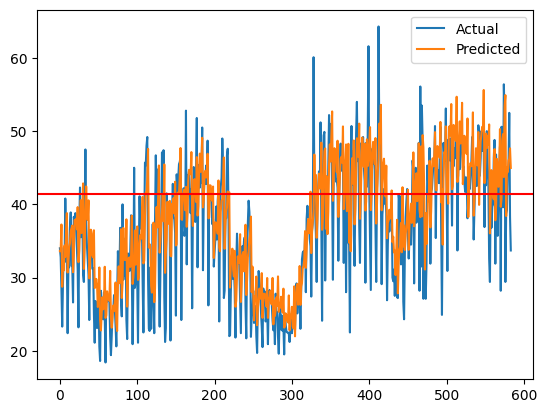

In [ ]:
lr_model = LinearRegression()

lr_model.fit(x_train_sc, y_train)

y_pred = lr_model.predict(x_test_sc)

print('Linear MAE:',mean_absolute_error(y_test, y_pred))
print('Linear MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE = {}
result_MAPE = {}
result_r2 = {}
result_MAE['Linear Regression'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['Linear Regression'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['Linear Regression'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 2) 모델2 KNN

MAE: 5.68568493150685
MAPE: 0.15804209810245562
R2: 0.3158549637910034
평균 : 41.34819897084048


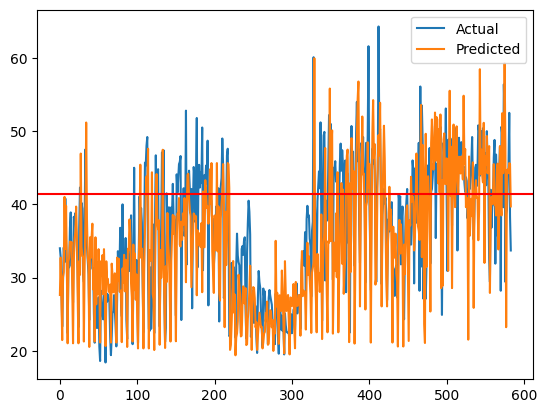

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(x_train_sc, y_train)

y_pred = knn_model.predict(x_test_sc)

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['KNN'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['KNN'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['KNN'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 3) 모델3 Decision Tree

MAE: 5.55023447342921
MAPE: 0.1602568397082424
R2: 0.27971963222071394


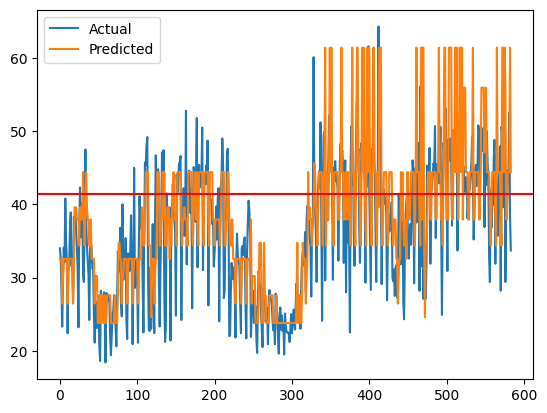

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=5)

dt_model.fit(x_train_sc, y_train)

y_pred = dt_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['DecisionTreeRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['DecisionTreeRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['DecisionTreeRegressor'] = round(r2_score(y_test, y_pred), 3)

plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 4) 모델4 Random Forest

Random MAE: 4.779429050173289
Random MAPE: 0.14230142870915496
R2: 0.495659615655893
평균 : 41.34819897084048


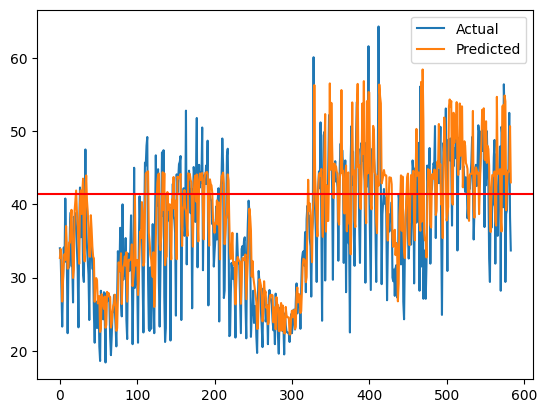

In [ ]:
rf_model = RandomForestRegressor(max_depth=5, random_state = 1)

rf_model.fit(x_train_sc, y_train)

y_pred = rf_model.predict(x_test_sc)

print('Random MAE:', mean_absolute_error(y_test, y_pred))
print('Random MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['RF'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['RF'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['RF'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

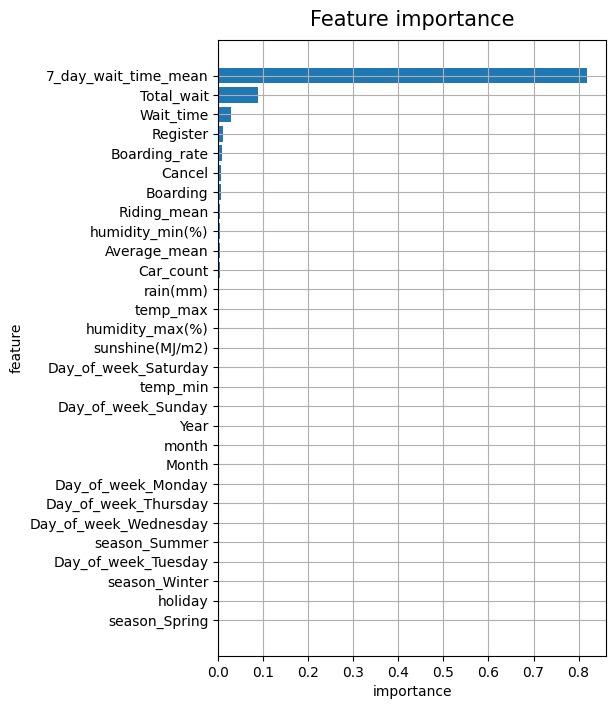

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = rf_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)

plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

#### 5) 모델5 XGBoost

XGB MAE: 4.957934014111349
XGB MAPE: 0.14224164685458807
XGB R2: 0.4209191190511715
평균 : 41.34819897084048


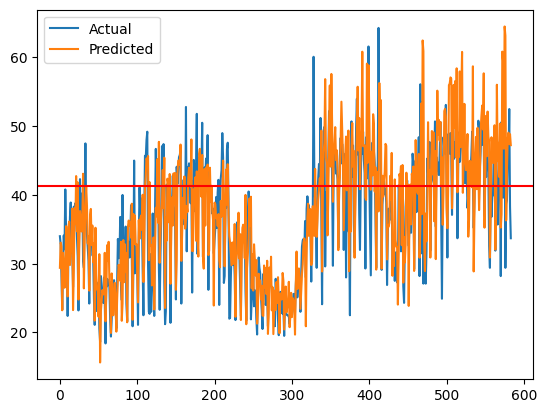

In [ ]:
xg_model = XGBRegressor(max_depth=5, random_state=1)

xg_model.fit(x_train_sc, y_train)

y_pred = xg_model.predict(x_test_sc)

print('XGB MAE:', mean_absolute_error(y_test, y_pred))
print('XGB MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('XGB R2:', r2_score(y_test, y_pred))

result_MAE['XGB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['XGB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['XGB'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

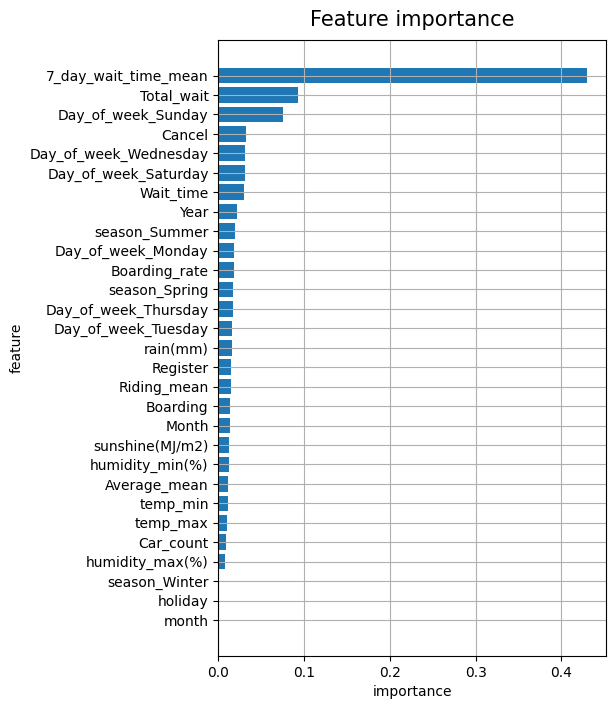

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = xg_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)


plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

#### 6) 모델6 LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Light MAE: 4.324846306622043
Light MAPE: 0.12482629768423809
R2: 0.5570000479493749
평균 : 41.34819897084048


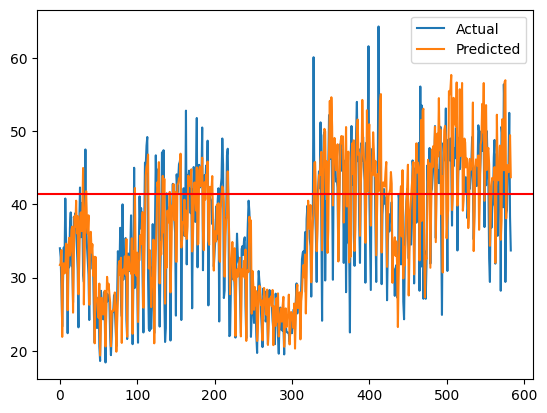

In [ ]:
lg_model = LGBMRegressor(max_depth=5, verbose=-1)

lg_model.fit(x_train_sc, y_train)

y_pred = lg_model.predict(x_test_sc)

print('Light MAE:', mean_absolute_error(y_test, y_pred))
print('Light MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['LGB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['LGB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['LGB'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

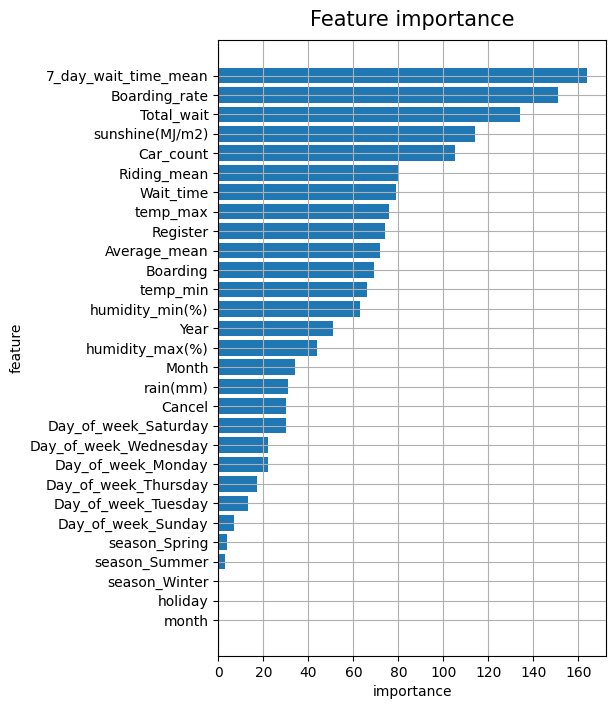

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = lg_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)


plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

Ridge MAE: 4.542206835903727
Ridge MAPE: 0.13939353374412705
R2: 0.5246228290748671
평균 : 41.34819897084048


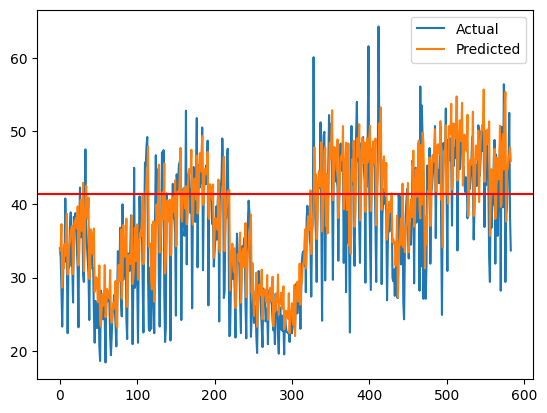

In [ ]:
rd_model = Ridge()

rd_model.fit(x_train_sc, y_train)

y_pred = rd_model.predict(x_test_sc)

print('Ridge MAE:', mean_absolute_error(y_test, y_pred))
print('Ridge MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['RID'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['RID'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['RID'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

Learning rate set to 0.046804
0:	learn: 14.5187581	total: 50.6ms	remaining: 50.6s
1:	learn: 14.1302989	total: 53.9ms	remaining: 26.9s
2:	learn: 13.7525976	total: 57.1ms	remaining: 19s
3:	learn: 13.4048520	total: 60.2ms	remaining: 15s
4:	learn: 13.0631909	total: 63.2ms	remaining: 12.6s
5:	learn: 12.7472138	total: 66.3ms	remaining: 11s
6:	learn: 12.4599657	total: 69.5ms	remaining: 9.86s
7:	learn: 12.2006218	total: 72.7ms	remaining: 9.01s
8:	learn: 11.9423476	total: 75.9ms	remaining: 8.36s
9:	learn: 11.7022917	total: 79.1ms	remaining: 7.83s
10:	learn: 11.4926427	total: 82.3ms	remaining: 7.4s
11:	learn: 11.2681619	total: 85.4ms	remaining: 7.03s
12:	learn: 11.0538564	total: 88.6ms	remaining: 6.72s
13:	learn: 10.8606230	total: 91.7ms	remaining: 6.46s
14:	learn: 10.6805863	total: 94.9ms	remaining: 6.23s
15:	learn: 10.5119007	total: 98.4ms	remaining: 6.05s
16:	learn: 10.3409698	total: 102ms	remaining: 5.87s
17:	learn: 10.1881586	total: 105ms	remaining: 5.7s
18:	learn: 10.0401739	total: 108ms	r

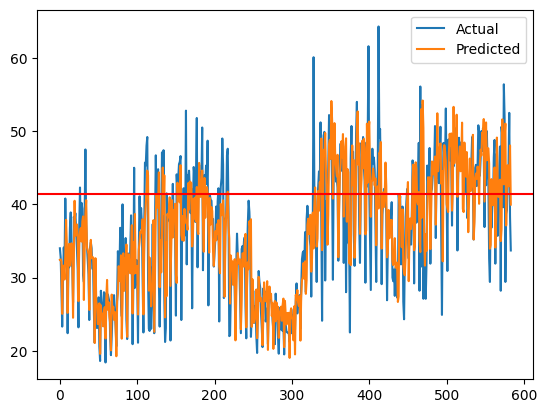

In [ ]:
cat_model = CatBoostRegressor()
cat_model.fit(x_train_sc, y_train)

# 예측 수행
y_pred = cat_model.predict(x_test_sc)

# 성능 평가
print('CatBoost MAE:', mean_absolute_error(y_test, y_pred))
print('CatBoost MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['catB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['catB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['catB'] = round(r2_score(y_test, y_pred), 3)
# 평균 값 계산
y_mean = y_train.mean()
print('평균 :', y_mean)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

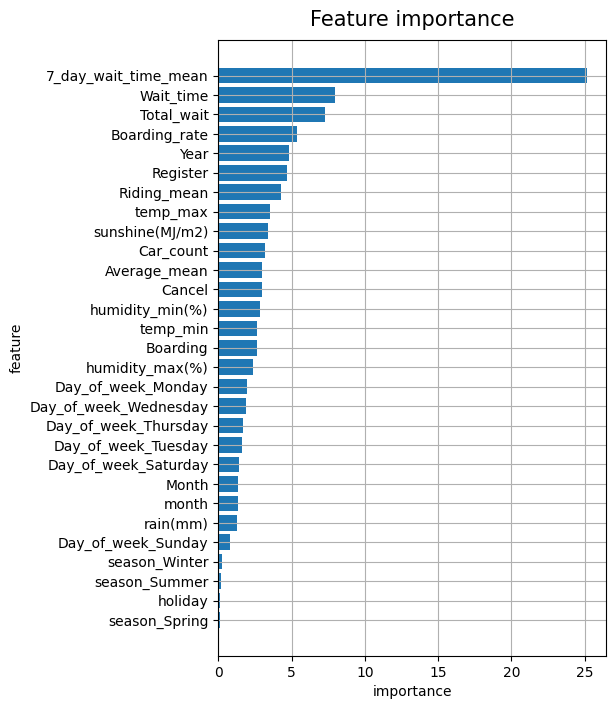

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = cat_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)


plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

MAE: 3.961486870046908
MAPE: 0.11682669229652072
R2: 0.6271020862471702


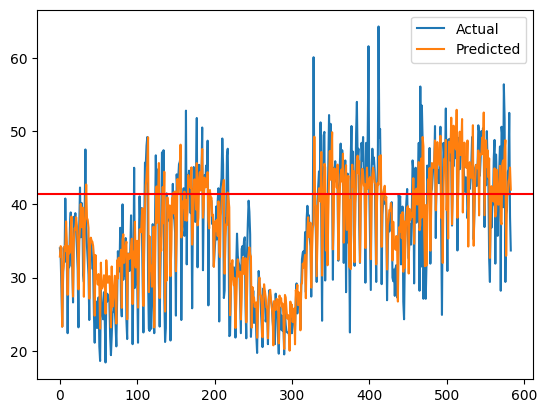

In [ ]:
svr_model = SVR()
svr_model.fit(x_train_sc, y_train)
y_pred = svr_model.predict(x_test_sc)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['SVM'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['SVM'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['SVM'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### AdaBoostRegressor

MAE: 5.708750223097861
MAPE: 0.17886971967074103
R2: 0.289318792240737


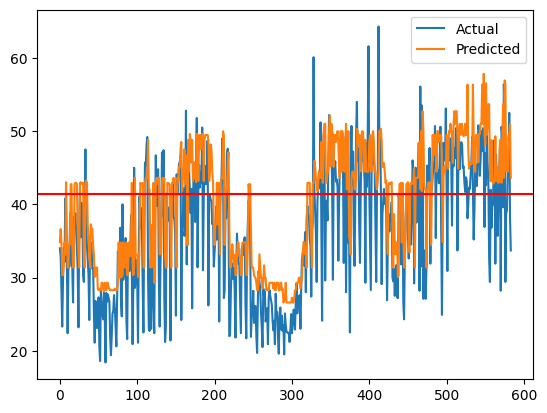

In [ ]:
ada_model = AdaBoostRegressor(random_state = 1)
ada_model.fit(x_train_sc, y_train)
y_pred = ada_model.predict(x_test_sc)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['AdaBoost'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['AdaBoost'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['AdaBoost'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### BaggingRegressor

MAE: 5.187876712328767
MAPE: 0.15289991399955968
R2: 0.390674373274877


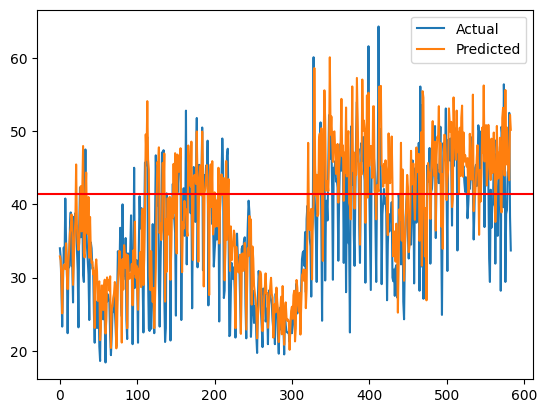

In [ ]:
bagging_model = BaggingRegressor(random_state=1)
bagging_model.fit(x_train_sc, y_train)
y_pred = bagging_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['BaggingRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['BaggingRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['BaggingRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### ExtraTreesRegressor

MAE: 4.334455479452057
MAPE: 0.1258407559377756
R2: 0.5524160129609306


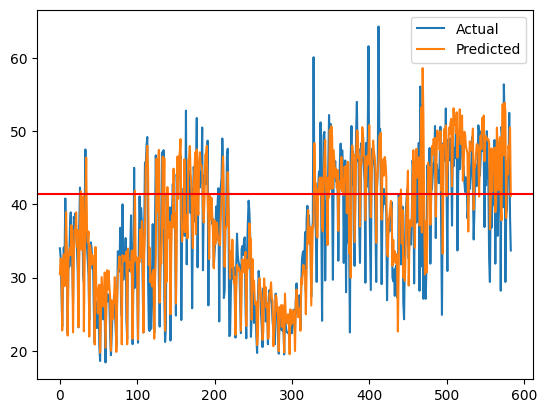

In [ ]:
EX_model = ExtraTreesRegressor(random_state=1)
EX_model.fit(x_train_sc, y_train)
y_pred = EX_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['ExtraTreesRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['ExtraTreesRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['ExtraTreesRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### GraientBoostingRegressor

MAE: 5.431503648168142
MAPE: 0.15841637322238428
R2: 0.34273333711037757


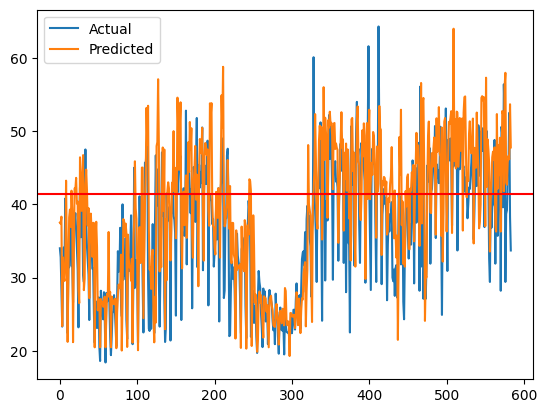

In [ ]:
GB_model = GradientBoostingRegressor(max_depth=15,
                                  random_state=1)
GB_model.fit(x_train_sc, y_train)
y_pred = GB_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['GradientBoostingRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['GradientBoostingRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['GradientBoostingRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### VotingRegressor

MAE: 4.23721720123624
MAPE: 0.12449631039210685
R2: 0.5859333109192413


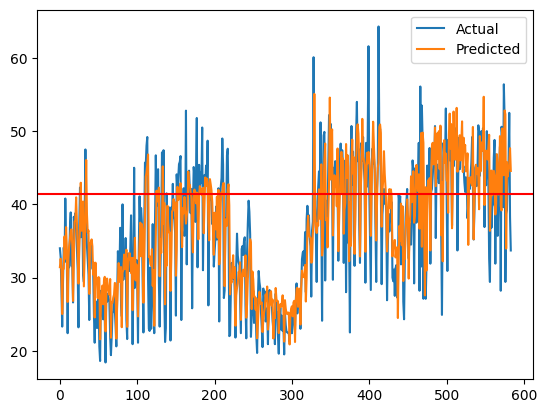

In [ ]:
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

voting_model = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
voting_model.fit(x_train_sc, y_train)
y_pred = voting_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['VotingRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['VotingRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['VotingRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

## 3.모델별 성능 비교

In [ ]:
# 성능 비교
print('=' * 40)
print('mean_absolute_error 성능비교')
for m_name, score in result_MAE.items():
    print(m_name, score)
print('=' * 40)

mean_absolute_error 성능비교
Linear Regression 4.499
KNN 5.686
RF 4.779
XGB 4.958
LGB 4.325
RID 4.542
catB 4.124
SVM 3.961
AdaBoost 5.709
BaggingRegressor 5.188
ExtraTreesRegressor 4.334
DecisionTreeRegressor 5.55
GradientBoostingRegressor 5.432
VotingRegressor 4.237


In [ ]:
print('=' * 40)
print('mean_absolute_percentage_error 성능비교')
for m_name, score in result_MAPE.items():
    print(m_name, score)
print('=' * 40)

mean_absolute_percentage_error 성능비교
Linear Regression 0.138
KNN 0.158
RF 0.142
XGB 0.142
LGB 0.125
RID 0.139
catB 0.118
SVM 0.117
AdaBoost 0.179
BaggingRegressor 0.153
ExtraTreesRegressor 0.126
DecisionTreeRegressor 0.16
GradientBoostingRegressor 0.158
VotingRegressor 0.124


In [ ]:
print('=' * 40)
print('R2-score 성능비교')
for m_name, score in result_r2.items():
    print(m_name, score)
print('=' * 40)

R2-score 성능비교
Linear Regression 0.529
KNN 0.316
RF 0.496
XGB 0.421
LGB 0.557
RID 0.525
catB 0.589
SVM 0.627
AdaBoost 0.289
BaggingRegressor 0.391
ExtraTreesRegressor 0.552
DecisionTreeRegressor 0.28
GradientBoostingRegressor 0.343
VotingRegressor 0.586
